# Road Traffic Accident Data 2023: Data Exploration

In [15]:
# Import libaries
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from typing import List

In [16]:
def side_by_side_display(list: List):
    html = '<div style="display: flex; flex-flow: row; gap: 1rem">'
    for element in list:
        html += element.to_html()
    html += '</div>'
    display(HTML(html))

In [17]:
# Import the data
df_circumstances = pd.read_csv('../../data/B_renamed/characteristics-2023.csv', sep=';')
df_locations = pd.read_csv('../../data/B_renamed/locations-2023.csv', sep=';')
df_users = pd.read_csv('../../data/B_renamed/users-2023.csv', sep=';')
df_vehicles = pd.read_csv('../../data/B_renamed/vehicles-2023.csv', sep=';')

/var/folders/qq/q7ccyxjj6tb1hv30jxq8zdbc0000gn/T/ipykernel_3634/3395461858.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_locations = pd.read_csv('../data/renamed/locations-2023.csv', sep=';')


In [18]:
# Rename the columns into easier to understand english names
circumstances_column_names = {
    'Num_Acc': 'id_accident',
    'jour': 'day',
    'mois': 'month',
    'an': 'year',
    'hrmn': 'hour_minute',
    'lum': 'lighting_condition',
    'dep': 'department_code',
    'com': 'commune_code',
    'agg': 'location',
    'int': 'intersection',
    'atm': 'weather_condition',
    'col': 'type_of_collision',
    'adr': 'postal_address',
    'lat': 'latitude',
    'long': 'longitude'
}

location_column_names = {
    'Num_Acc': 'id_accident',
    'catr': 'road_category',
    'voie': 'road_number',
    'v1': 'road_number_index',
    'v2': 'road_number_letter',
    'circ': 'traffic_regime',
    'nbv': 'number_of_traffic_lanes',
    'vosp': 'reserved_lane_present',
    'prof': 'longitudinal_profile',
    'pr': 'nearest_reference_marker',
    'pr1': 'nearest_reference_marker_distance',
    'plan': 'horizontal_alignment',
    'lartpc': 'width_central_reservation',
    'larrout': 'carriageway_width',
    'surf': 'pavement_condition',
    'infra': 'infrastructure',
    'situ': 'accident_situation',
    'vma': 'speed_limit'
}

vehicles_column_names = {
    'Num_Acc': 'id_accident',
    'id_vehicule': 'id_vehicle',
    'num_veh': 'number_vehicle',
    'senc': 'direction_of_travel',
    'catv': 'vehicle_category',
    'obs': 'fixed_obstacle_struck',
    'obsm': 'mobile_obstacle_struck',
    'choc': 'initial_point_of_impact',
    'manv': 'main_maneuver_before_accident',
    'motor': 'motor_type',
    'occutc': 'number_occupants_in_public_transport'
}

users_column_names = {
    'Num_Acc': 'id_accident',
    'id_usager': 'id_user',
    'id_vehicule': 'id_vehicle',
    'num_veh': 'number_vehicle',
    'place': 'position',
    'catu': 'user_category',
    'grav': 'injury_severity', # This is the feature we want to predict.
    'sexe': 'sex',
    'an_nais': 'year_of_birth',
    'trajet': 'trip_purpose',
    'secu1': 'safety_equipment_1',
    'secu2': 'safety_equipment_2',
    'secu3': 'safety_equipment_3',
    'locp': 'pedestrian_location',
    'actp': 'pedestrian_action',
    'etatp': 'injured_pedestrian_alone'
}

In [19]:
df_circumstances.rename(columns=circumstances_column_names, inplace=True)
df_locations.rename(columns=location_column_names, inplace=True)
df_vehicles.rename(columns=vehicles_column_names, inplace=True)
df_users.rename(columns=users_column_names, inplace=True)

In [20]:
# Show first 5 elements in dataframes and their columns
df_dict = {
    'circumstances': df_circumstances,
    'locations': df_locations,
    'users': df_users,
    'vehicles': df_vehicles
}
for df in df_dict.values():
    display(df.head())

,id_accident,day,month,year,hour_minute,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du GÃ©nÃ©ral Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


,id_accident,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


,id_accident,id_user,id_vehicle,number_vehicle,position,user_category,injury_severity,sex,year_of_birth,trip_purpose,safety_equipment_1,safety_equipment_2,safety_equipment_3,pedestrian_location,pedestrian_action,injured_pedestrian_alone
0,202300000001,203Â 851Â 184,155Â 680Â 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203Â 851Â 182,155Â 680Â 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203Â 851Â 183,155Â 680Â 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203Â 851Â 180,155Â 680Â 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203Â 851Â 181,155Â 680Â 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


,id_accident,id_vehicle,number_vehicle,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport
0,202300000001,155Â 680Â 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155Â 680Â 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155Â 680Â 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155Â 680Â 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155Â 680Â 551,B01,1,7,0,2,9,2,4,NaN


## Find Null Values

Null Values in the Dataset can come in the following forms:
- NAN (No Value in the Cell)
- -1 (Not reported)
- 0 (Not reported / Not Applicable)
- . (Just a point)

In [21]:
# Show general info about dataframes
for key, value in df_dict.items():
    print(f'Data Frame: {key}\n')
    display(value.info())

    num = value.select_dtypes(include='number')
    objlike = num.astype('category')
    display(objlike.describe())
    
    display(value.describe(include='object'))
    print('-----------------------------------------------------------------------------------------------------------------\n\n')

Data Frame: circumstances

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_accident         54822 non-null  int64 
 1   day                 54822 non-null  int64 
 2   month               54822 non-null  int64 
 3   year                54822 non-null  int64 
 4   hour_minute         54822 non-null  object
 5   lighting_condition  54822 non-null  int64 
 6   department_code     54822 non-null  object
 7   commune_code        54822 non-null  object
 8   location            54822 non-null  int64 
 9   intersection        54822 non-null  int64 
 10  weather_condition   54822 non-null  int64 
 11  type_of_collision   54822 non-null  int64 
 12  postal_address      53433 non-null  object
 13  latitude            54822 non-null  object
 14  longitude           54822 non-null  object
dtypes: int64(9), object(6)
memory usage: 6.3+ M

None

,id_accident,day,month,year,lighting_condition,location,intersection,weather_condition,type_of_collision
count,54822,54822,54822,54822,54822,54822,54822,54822,54822
unique,54822,31,12,1,6,2,10,10,8
top,202300000001,7,6,2023,1,2,1,1,6
freq,1,2013,5452,54822,36117,34326,34842,42747,16625


,hour_minute,department_code,commune_code,postal_address,latitude,longitude
count,54822,54822,54822,53433,54822,54822
unique,1409,107,11311,29080,52905,53148
top,18:00,75,75116,A86,"-17,58400000","-149,56000000"
freq,678,4763,506,342,12,13


-----------------------------------------------------------------------------------------------------------------


Data Frame: locations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70860 entries, 0 to 70859
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id_accident                        70860 non-null  int64 
 1   road_category                      70860 non-null  int64 
 2   road_number                        58113 non-null  object
 3   road_number_index                  70860 non-null  int64 
 4   road_number_letter                 5884 non-null   object
 5   traffic_regime                     70860 non-null  int64 
 6   number_of_traffic_lanes            70860 non-null  object
 7   reserved_lane_present              70860 non-null  int64 
 8   longitudinal_profile               70860 non-null  int64 
 9   nearest_reference_marker           70860 non-null  obj

None

,id_accident,road_category,road_number_index,traffic_regime,reserved_lane_present,longitudinal_profile,horizontal_alignment,pavement_condition,infrastructure,accident_situation,speed_limit
count,70860,70860,70860,70860,70860,70860,70860,70860,70860,70860,70860
unique,54822,8,4,5,5,5,5,10,11,8,21
top,202300035508,4,0,2,0,1,1,1,0,1,50
freq,5,32364,54316,43483,57756,58409,58434,55970,59086,59259,32127


,road_number,road_number_letter,number_of_traffic_lanes,nearest_reference_marker,nearest_reference_marker_distance,width_central_reservation,carriageway_width
count,58113,5884,70860,70860,70860,31,70860
unique,20063,24,15,446,1363,19,107
top,1,D,2,-1,-1,3,-1
freq,476,3889,42580,29796,29984,4,52584


-----------------------------------------------------------------------------------------------------------------


Data Frame: users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125789 entries, 0 to 125788
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_accident               125789 non-null  int64  
 1   id_user                   125789 non-null  object 
 2   id_vehicle                125789 non-null  object 
 3   number_vehicle            125789 non-null  object 
 4   position                  125789 non-null  int64  
 5   user_category             125789 non-null  int64  
 6   injury_severity           125789 non-null  int64  
 7   sex                       125789 non-null  int64  
 8   year_of_birth             123191 non-null  float64
 9   trip_purpose              125789 non-null  int64  
 10  safety_equipment_1        125789 non-null  int64  
 11  safety_equipment_2   

None

,id_accident,position,user_category,injury_severity,sex,year_of_birth,trip_purpose,safety_equipment_1,safety_equipment_2,safety_equipment_3,pedestrian_location,injured_pedestrian_alone
count,125789,125789,125789,125789,125789,123191.0,125789,125789,125789,125789,125789,125789
unique,54822,11,3,5,3,107.0,8,11,11,11,11,4
top,202300043857,1,1,1,1,2003.0,5,1,-1,-1,-1,-1
freq,65,93440,93462,53399,84013,3706.0,46131,72988,55419,123392,63330,115690


,id_user,id_vehicle,number_vehicle,pedestrian_action
count,125789,125789,125789,125789
unique,125789,93545,46,13
top,203Â 851Â 184,155Â 602Â 779,A01,-1
freq,1,65,75767,63253


-----------------------------------------------------------------------------------------------------------------


Data Frame: vehicles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93585 entries, 0 to 93584
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_accident                           93585 non-null  int64  
 1   id_vehicle                            93585 non-null  object 
 2   number_vehicle                        93585 non-null  object 
 3   direction_of_travel                   93585 non-null  int64  
 4   vehicle_category                      93585 non-null  int64  
 5   fixed_obstacle_struck                 93585 non-null  int64  
 6   mobile_obstacle_struck                93585 non-null  int64  
 7   initial_point_of_impact               93585 non-null  int64  
 8   main_maneuver_before_accident         93585 non-null  int64  
 9   motor_type 

None

,id_accident,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport
count,93585,93585,93585,93585,93585,93585,93585,93585,838.0
unique,54822,5,32,19,8,11,28,8,27.0
top,202300037234,1,7,0,2,1,1,1,1.0
freq,13,41843,54620,79495,65481,34068,38979,72949,631.0


,id_vehicle,number_vehicle
count,93585,93585
unique,93585,46
top,155Â 680Â 557,A01
freq,1,54043


-----------------------------------------------------------------------------------------------------------------




Interesting Fact:
- Commune Code "75116 - Paris 16e Arrondissement" has had the most traffic accidents in 2023 with 506 accidents.

In [22]:
import pandas as pd
import numpy as np


# AI generated helper function
def not_reported_summary(
    df: pd.DataFrame,
    zeros_as_na_cols=None,                 # columns where 0 means "Sans objet/Aucun"
    extra_markers_by_col=None              # dict like {"col": {"-9","99"}}
) -> pd.DataFrame:
    zeros_as_na_cols = set(zeros_as_na_cols or [])
    extra_markers_by_col = extra_markers_by_col or {}

    rows = []
    for col in df.columns:
        s = df[col]

        # work on strings to catch both string and numeric codes
        s_str = s.astype(str).str.strip()
        s_num = pd.to_numeric(s_str, errors="coerce")

        nulls   = s.isna().sum()
        blanks  = (s_str == "").sum()
        dots    = (s_str == ".").sum()
        minus1  = (s_num == -1).sum()      # "-1 = Non renseigné" in many fields
        zero_na = ((s_num == 0) | (s_str == "0")).sum() if col in zeros_as_na_cols else 0

        # column-specific extra markers (e.g., {"grav": {"9"}, "trajet": {"0"}})
        extras = 0
        if col in extra_markers_by_col:
            extras = s_str.isin(set(extra_markers_by_col[col])).sum()

        any_na = nulls + blanks + dots + minus1 + zero_na + extras
        pct    = any_na / len(df) * 100 if len(df) else 0

        rows.append({
            "column": col,
            "rows": len(df),
            "null": int(nulls),
            "blank": int(blanks),
            "dot(.)": int(dots),
            "-1_not_reported": int(minus1),
            "zero_as_na": int(zero_na),
            "extra_markers": int(extras),
            "any_missing_like": int(any_na),
            "any_missing_like_pct": round(pct, 2),
        })

    out = pd.DataFrame(rows).sort_values("any_missing_like_pct", ascending=False)
    return out

# --- Example usage ---
# df = pd.read_csv("LIEUX.csv", dtype=str)
# cols_where_zero_means_not_applicable = ["vosp", "infra", "situ"]  # 0 = "Sans objet"/"Aucun" in these. See codebook.
# summary = not_reported_summary(df, zeros_as_na_cols=cols_where_zero_means_not_applicable)
# summary.to_csv("missing_summary_LIEUX.csv", index=False)
# summary.head(20)


for key, value in df_dict.items():
    print(f'DataFrame: {key}')
    display(not_reported_summary(value))


display(not_reported_summary(value, zeros_as_na_cols=["manv"]))

DataFrame: circumstances


,column,rows,null,blank,dot(.),-1_not_reported,zero_as_na,extra_markers,any_missing_like,any_missing_like_pct
12,postal_address,54822,1389,0,0,0,0,0,1389,2.53
11,type_of_collision,54822,0,0,0,13,0,0,13,0.02
9,intersection,54822,0,0,0,6,0,0,6,0.01
10,weather_condition,54822,0,0,0,4,0,0,4,0.01
0,id_accident,54822,0,0,0,0,0,0,0,0.00
1,day,54822,0,0,0,0,0,0,0,0.00
2,month,54822,0,0,0,0,0,0,0,0.00
3,year,54822,0,0,0,0,0,0,0,0.00
4,hour_minute,54822,0,0,0,0,0,0,0,0.00
5,lighting_condition,54822,0,0,0,2,0,0,2,0.00


DataFrame: locations


,column,rows,null,blank,dot(.),-1_not_reported,zero_as_na,extra_markers,any_missing_like,any_missing_like_pct
12,width_central_reservation,70860,70829,0,0,0,0,0,70829,99.96
4,road_number_letter,70860,64976,0,0,0,0,0,64976,91.70
13,carriageway_width,70860,0,0,0,52584,0,0,52584,74.21
10,nearest_reference_marker_distance,70860,0,0,0,29984,0,0,29984,42.31
9,nearest_reference_marker,70860,0,0,0,29796,0,0,29796,42.05
3,road_number_index,70860,0,0,0,16438,0,0,16438,23.20
2,road_number,70860,12747,0,0,0,0,0,12747,17.99
5,traffic_regime,70860,0,0,0,5021,0,0,5021,7.09
17,speed_limit,70860,0,0,0,4578,0,0,4578,6.46
6,number_of_traffic_lanes,70860,0,0,0,4153,0,0,4153,5.86


DataFrame: users


,column,rows,null,blank,dot(.),-1_not_reported,zero_as_na,extra_markers,any_missing_like,any_missing_like_pct
12,safety_equipment_3,125789,0,0,0,123392,0,0,123392,98.09
15,injured_pedestrian_alone,125789,0,0,0,115690,0,0,115690,91.97
13,pedestrian_location,125789,0,0,0,63330,0,0,63330,50.35
14,pedestrian_action,125789,0,0,0,63253,0,0,63253,50.29
11,safety_equipment_2,125789,0,0,0,55419,0,0,55419,44.06
8,year_of_birth,125789,2598,0,0,0,0,0,2598,2.07
9,trip_purpose,125789,0,0,0,2499,0,0,2499,1.99
7,sex,125789,0,0,0,2431,0,0,2431,1.93
10,safety_equipment_1,125789,0,0,0,2292,0,0,2292,1.82
6,injury_severity,125789,0,0,0,118,0,0,118,0.09


DataFrame: vehicles


,column,rows,null,blank,dot(.),-1_not_reported,zero_as_na,extra_markers,any_missing_like,any_missing_like_pct
10,number_occupants_in_public_transport,93585,92747,0,0,0,0,0,92747,99.10
9,motor_type,93585,0,0,0,181,0,0,181,0.19
3,direction_of_travel,93585,0,0,0,103,0,0,103,0.11
5,fixed_obstacle_struck,93585,0,0,0,57,0,0,57,0.06
7,initial_point_of_impact,93585,0,0,0,58,0,0,58,0.06
6,mobile_obstacle_struck,93585,0,0,0,46,0,0,46,0.05
8,main_maneuver_before_accident,93585,0,0,0,37,0,0,37,0.04
0,id_accident,93585,0,0,0,0,0,0,0,0.00
1,id_vehicle,93585,0,0,0,0,0,0,0,0.00
2,number_vehicle,93585,0,0,0,0,0,0,0,0.00


,column,rows,null,blank,dot(.),-1_not_reported,zero_as_na,extra_markers,any_missing_like,any_missing_like_pct
10,number_occupants_in_public_transport,93585,92747,0,0,0,0,0,92747,99.10
9,motor_type,93585,0,0,0,181,0,0,181,0.19
3,direction_of_travel,93585,0,0,0,103,0,0,103,0.11
5,fixed_obstacle_struck,93585,0,0,0,57,0,0,57,0.06
7,initial_point_of_impact,93585,0,0,0,58,0,0,58,0.06
6,mobile_obstacle_struck,93585,0,0,0,46,0,0,46,0.05
8,main_maneuver_before_accident,93585,0,0,0,37,0,0,37,0.04
0,id_accident,93585,0,0,0,0,0,0,0,0.00
1,id_vehicle,93585,0,0,0,0,0,0,0,0.00
2,number_vehicle,93585,0,0,0,0,0,0,0,0.00


Circumstances:
 - col (Type of collision): 13 missing values. Should be dropped.
 - atm (Weather conditions): 4 missing values. Should be dropped.
 - int (Intersection): 6 missing values. Drop
 - lum (Lighting conditions at the time of the accident): 2 missing values. Should be dropped.

Locations:
 - lartpc (Width of central reservation/median (if any) in meters): 70829 missing values (almost all rows). Basically irrelevant data. --> Drop entire Column
 - v2 (Alphanumeric letter index of the road): 64976 missing values are correct!!! 
        --> Important: Street names in France are build like this: Type + Number + Numeric index + Alphanumeric index (catr + voie + v1 + v2)
        --> Except for the road type (catr), **everything else is optional**
        --> The concrete road names (e.g. A7A tres), can be completely reconstructed using these features. 
- larrot (Carriageway width used by vehicles (excludes shoulders, medians, parking bays), in meters): Basically irrelevant data --> Drop entire column
- pr (Reference marker (PR) number upstream): Reports the nearest reference marker to the accident. Another method of geolocation together with pr1 (distance from this reference marker.) --> Column can be dropped.
- vma: (Speed limit at the place and time of the accident.): Could be very interesting. Drop affected rows?
- nbv (Total number of traffic lanes): 4000 missing values. Since most roads will have 1 lane, not-reported values could be replaced with 1. Only values != 1 could be interesting for a classifier.
- vosp (Presence of a reserved lane, regardless of whether the accident occured on it). (-1: not reported) and (0: not applicable) --> High chance that values were not reported because it was not applicable. We could replace -1 with 0 values.
- infra (Facilities / Infrastructure): (-1: not reported), (0: None) --> It seems likely that things were not reported because no special infrastructure was involved. Replace -1 with 0.
- situ (Accident Situation): (-1: not reported), (0: None) --> Maybe something special is going on, maybe drop the rows?
- plan (Horizontal Alignment): (-1, not reported), (1, straight), (2, curve left), (3, curve right), (4, S-Curve). --> Drop Rows?


Users:
 - secu1, secu2, secu3 (Security Equipment used) --> Up to 3 pieces of equipment can be noted down. Only if secu1 is missing do we have an actual missing value.
 - etatp (Whether the injured pedestrian was alone or not)
 - actp (Pedestrian action)
 - locp (Pedestrian location): (-1, not reported), (0, not applicable) --> It seems likely that null values come from the fact that users in vehicles are not pedestrians, leaving those fields open.
        --> Important: We should NOT get rid of the info, but instead use it to e.g. create a feature for "is pedestrian" or something.
 - an_nais (Year of birth): 2000 missing values. Older people could be more prone to be hurt in an accident. hmmm....
 - trajet (Trip purpose at the time of the accident). 
 - sexe (Sex): 2000 missing values. Women could be more likely to be hurt, men could be more reckless drivers. Could be relevant.
 - grav (Injury severity): **Our target variable** --> Missing values absolutly need to be dropped.
 - place (Position occupied by the user in the vehicle at the time of the accident): Injury severity could be influenced be seeting position. How to handle?
 

Vehicles:
 - occutc (Number of occupents in public transport): Should already be incoded by the vehicle category to some degree (catv), keeping it could cause high correlation. Should be dropped.
 - motor (Vehicle motorization type): Should also already be incoded by the vehicle category to some degree. Drop?
 - senc (Direction of travel): (−1 – Not reported; 0 – Unknown; 1 – Increasing PK/PR or address number; 2 – Decreasing PK/PR or address number; 3 – No marker present.) --> Seems kinda useless
 - choc (Initial point of impact): Includes (9: rollover). Very important --> At most, delete missing rows.
 - obs (Fixed obstacle struck): (-1, not reported), (0: not applicable) --> Seems likely that things have not been reported if not applicable, replace with 0?
 - manv (Main maneuver before the accident)
 - obsm (Mobile obstacle struck): Includes Pedestrians, Animals, etc.
 - catv (Vehicle category): Only 3 missing values, just drop the rows.

## Road Numbers can be strings
- Probably due to the input by the officers, the "road_number" feature column predominantly contains road names instead of their corresponding number.

In [23]:
# Road Numbers can also be strings :( 
# It might be necessary to drop the road_number.
s = pd.to_numeric(df_locations["road_number"], errors="coerce")
mask = s.isna()       # integer-valued
df_ints = df_locations[mask]
df_ints

,id_accident,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
6,202300000005,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
7,202300000005,4,NaN,0,NaN,2,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
8,202300000006,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70855,202300054818,4,LA FONTAINE (RUE JEAN DE),0,NaN,2,2,0,1,-1,0,1,NaN,-1,1,0,1,50
70856,202300054819,4,RN3 (ANCIENNE ROUTE),0,NaN,2,2,0,2,0,0,1,NaN,-1,1,0,1,50
70857,202300054820,4,BAMBOU (CHEMIN DE LA RUELLE),0,NaN,2,2,0,2,0,0,2,NaN,-1,1,0,8,30
70858,202300054821,2,ROUTE NATIONALE 1,0,NaN,-1,2,1,1,4,50,1,NaN,-1,1,0,1,90


## Multiple Locations per Accident

- The location dataframe includes multiple location entires per accident id.
- The reason for this can be explained by taking a look at the "intersection" property of the circumstances dataframe.
- Multiple location rows coincide with the accident happening at an intersection with more locations being present the bigger the intersection is.

In [24]:
# There are 5 locations mentioned for the accident id 202300035508
df_locations['id_accident'].value_counts()

id_accident
202300035508    5
202300015235    4
202300054010    4
202300007795    4
202300053680    4
               ..
202300008056    1
202300008055    1
202300027108    1
202300008054    1
202300054822    1
Name: count, Length: 54822, dtype: int64

In [25]:
# Display the 5 locations listed for the one accident.
df_locations[df_locations['id_accident'] == 202300035508]

,id_accident,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit
45929,202300035508,4,BOULEVARD DE BEAUSEJOUR,0,NaN,1,0,0,1,0,0,1,NaN,-1,1,0,1,30
45930,202300035508,4,BOULEVARD EMILE AUGIER,0,NaN,3,2,0,1,-1,-1,1,NaN,-1,1,9,1,50
45931,202300035508,4,CHAUSSEE LA MUETTE,0,NaN,3,1,3,1,-1,-1,1,NaN,-1,1,6,1,50
45932,202300035508,4,RUE D ANDIGNE,0,NaN,1,1,0,1,0,0,1,NaN,-1,1,0,1,30
45933,202300035508,4,RUE LARGILLIERE,0,NaN,2,2,0,1,0,0,1,NaN,-1,1,0,1,30


In [26]:
# Display the accident in question.
df_circumstances[df_circumstances['id_accident'] == 202300035508]

,id_accident,day,month,year,hour_minute,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude
35507,202300035508,18,5,2023,00:26,5,75,75116,2,5,1,6,CHAUSSEE LA MUETTE,"48,85817500","2,27261000"


- An intersection type of 5 corresponds to an intersection with more than 4 branches.
- It thus makes sense that 5 locations were mentioned in the table.

## Convert Hour Minute Format
- The hour_minute format needs to be converted into two separate int columns to be useful.

In [27]:
# Convert the hour_minute attribute into two separate "hour" and "minute" features.
datetime_series = pd.to_datetime(df_circumstances['hour_minute'], format='%H:%M')
df_circumstances['hour_minute'] = datetime_series
df_circumstances['hour'] = datetime_series.dt.hour
df_circumstances['minute'] = datetime_series.dt.minute
# df_circumstances.drop(columns='hour_minute', inplace=True)
df_circumstances

,id_accident,day,month,year,hour_minute,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute
0,202300000001,7,5,2023,1900-01-01 06:00:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100",6,0
1,202300000002,7,5,2023,1900-01-01 05:30:00,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146",5,30
2,202300000003,7,5,2023,1900-01-01 20:50:00,1,94,94022,2,3,2,1,Avenue du GÃ©nÃ©ral Leclerc,"48,76240000","2,40655000",20,50
3,202300000004,6,5,2023,1900-01-01 23:57:00,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575",23,57
4,202300000005,7,5,2023,1900-01-01 00:50:00,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000",0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,202300054818,26,10,2023,1900-01-01 20:45:00,5,974,97416,2,1,1,6,LA FONTAINE (RUE JEAN DE),"-21,33828000","55,47771000",20,45
54818,202300054819,26,10,2023,1900-01-01 19:10:00,3,974,97416,1,1,1,3,RN3 (ANCIENNE ROUTE),"-21,28865000","55,50994000",19,10
54819,202300054820,26,10,2023,1900-01-01 09:40:00,1,974,97411,2,1,1,7,BAMBOU (CHEMIN DE LA RUELLE),"-20,90129000","55,40598000",9,40
54820,202300054821,26,10,2023,1900-01-01 17:20:00,1,973,97302,1,6,1,3,ROUTE NATIONALE 1,"4,89713000","-52,32854000",17,20


## Visualize the Data

### Number of Accidents based on the Time

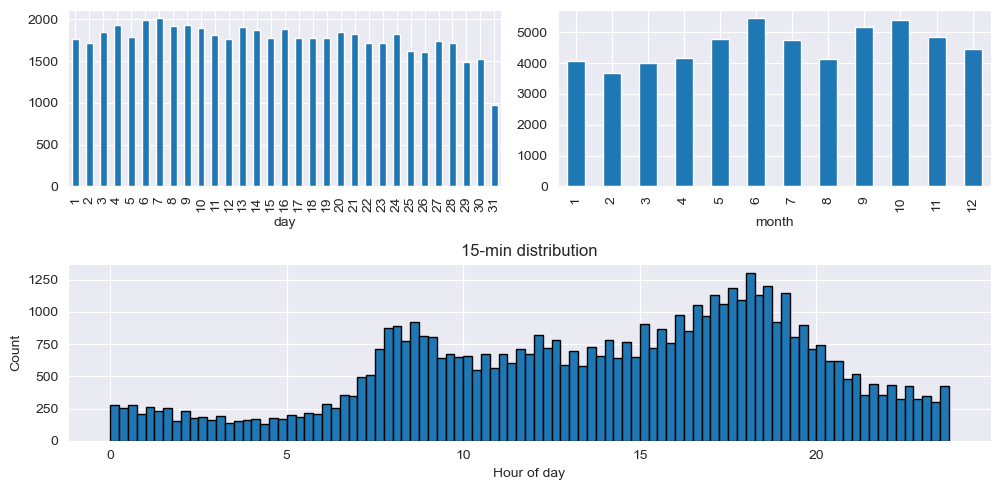

In [28]:
# Number of accidents per day and month

fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(2, 3)

ax_top_left = fig.add_subplot(gs[0, 0])
ax_top_right = fig.add_subplot(gs[0, 1])
ax_bottom = fig.add_subplot(gs[1, :2])


df_circumstances['day'].value_counts().sort_index().plot.bar(ax=ax_top_left)
df_circumstances['month'].value_counts().sort_index().plot.bar(ax=ax_top_right)

t = df_circumstances['hour_minute']
h = t.dt.hour + t.dt.minute/60.0              # fractional hour ∈ [0,24)
bins = np.arange(0, 24, 0.25)              # 15-min bins
ax = pd.Series(h).plot.hist(bins=bins, edgecolor="black", xlabel='Hour of day', ylabel='Count', title='15-min distribution', ax=ax_bottom)
# ax.set_xlabel("Hour of day"); ax.set_ylabel("Count"); ax.set_title("15-min distribution")
plt.tight_layout()


### Number of Accidents based on Intersection

<Axes: xlabel='intersection'>

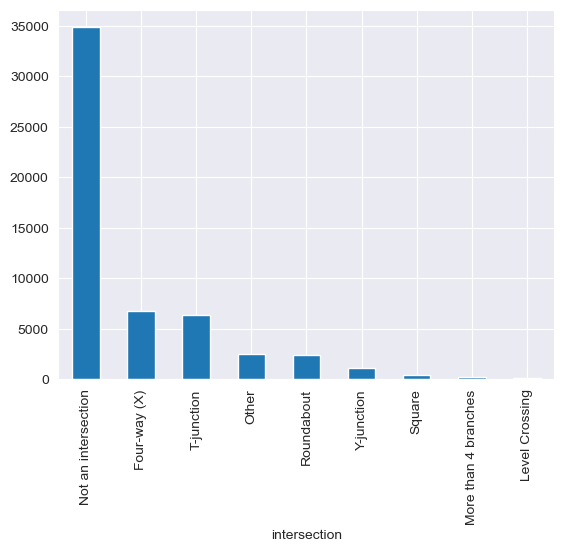

In [29]:
codebook = {
    1: 'Not an intersection',
    2: 'Four-way (X)',
    3: 'T-junction',
    4: 'Y-junction',
    5: 'More than 4 branches',
    6: 'Roundabout',
    7: 'Square',
    8: 'Level Crossing',
    9: 'Other'
}

df_circumstances['intersection'].map(codebook).value_counts().plot.bar()

<Axes: xlabel='safety_equipment_1'>

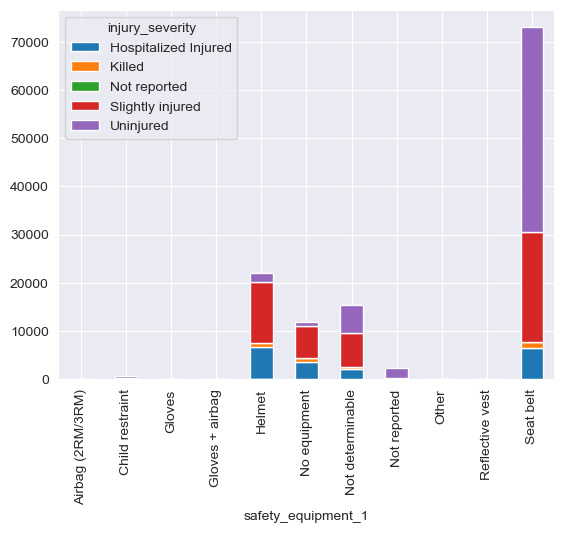

In [30]:
### Safety Equipment used and Injuries

codebook = {
    'injury_severity': {
        -1: 'Not reported',
        1: 'Uninjured',
        2: 'Killed',
        3: 'Hospitalized Injured',
        4: 'Slightly injured'
    },
    'secu1': {
        -1: 'Not reported',
        0: 'No equipment',
        1: 'Seat belt',
        2: 'Helmet',
        3: 'Child restraint',
        4: 'Reflective vest',
        5: 'Airbag (2RM/3RM)',
        6: 'Gloves',
        7: 'Gloves + airbag',
        8: 'Not determinable',
        9: 'Other'
    }
}


tmp = df_users[['safety_equipment_1', 'injury_severity']].copy()
tmp['safety_equipment_1'] = tmp['safety_equipment_1'].map(codebook['secu1'])
tmp['injury_severity'] = tmp['injury_severity'].map(codebook['injury_severity'])
 
tmp.groupby(['safety_equipment_1', 'injury_severity']).size().unstack().plot(kind='bar', stacked=True)




In [31]:
df_users_secure_flags = df_users.copy()

SECU_FLAG = {
    1:"used_belt", 2:"used_helmet", 3:"used_child_restraint", 4:"used_reflective_vest",
    5:"used_airbag_ptw", 6:"used_gloves_ptw", 7:"used_gloves_and_airbag_ptw", 9:"used_other"
}
SECU_COLS = ["safety_equipment_1","safety_equipment_2","safety_equipment_3"]

S = df_users_secure_flags[SECU_COLS].apply(pd.to_numeric, errors="coerce")

for code, name in SECU_FLAG.items():
    df_users_secure_flags[name] = S.isin([code]).any(axis=1)

df_users_secure_flags["used_any_secu"] = S.isin(list(SECU_FLAG.keys())).any(axis=1)
df_users_secure_flags["no_equipment"]  = S.isin([0]).any(axis=1) & ~df_users_secure_flags["used_any_secu"]
df_users_secure_flags["secu_not_reported"] = S.isin([-1]).any(axis=1) & ~df_users_secure_flags["used_any_secu"]  # optional
df_users_secure_flags["secu_not_determinable"] = S.isin([8]).any(axis=1) & ~df_users_secure_flags["used_any_secu"]  # optional


df_users_secure_flags



,id_accident,id_user,id_vehicle,number_vehicle,position,user_category,injury_severity,sex,year_of_birth,trip_purpose,...,used_child_restraint,used_reflective_vest,used_airbag_ptw,used_gloves_ptw,used_gloves_and_airbag_ptw,used_other,used_any_secu,no_equipment,secu_not_reported,secu_not_determinable
0,202300000001,203Â 851Â 184,155Â 680Â 557,A01,1,1,4,1,1978.0,5,...,False,False,False,False,False,False,True,False,False,False
1,202300000002,203Â 851Â 182,155Â 680Â 556,A01,1,1,1,2,1997.0,9,...,False,False,False,False,False,False,True,False,False,False
2,202300000002,203Â 851Â 183,155Â 680Â 556,A01,10,3,3,1,1997.0,9,...,False,False,False,False,False,False,False,True,True,False
3,202300000003,203Â 851Â 180,155Â 680Â 554,B01,1,1,3,1,1987.0,0,...,False,False,False,True,False,False,True,False,False,False
4,202300000003,203Â 851Â 181,155Â 680Â 555,A01,1,1,1,2,1984.0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125784,202300054821,203Â 720Â 720,155Â 583Â 346,A01,1,1,4,1,1971.0,1,...,False,False,False,False,False,False,True,False,False,False
125785,202300054821,203Â 720Â 721,155Â 583Â 347,B01,1,1,1,2,1968.0,1,...,False,False,False,False,False,False,True,False,False,False
125786,202300054822,203Â 720Â 717,155Â 583Â 344,A01,2,2,1,2,2003.0,2,...,False,False,False,False,False,False,True,False,False,False
125787,202300054822,203Â 720Â 718,155Â 583Â 344,A01,1,1,1,2,2002.0,1,...,False,False,False,False,False,False,True,False,False,False


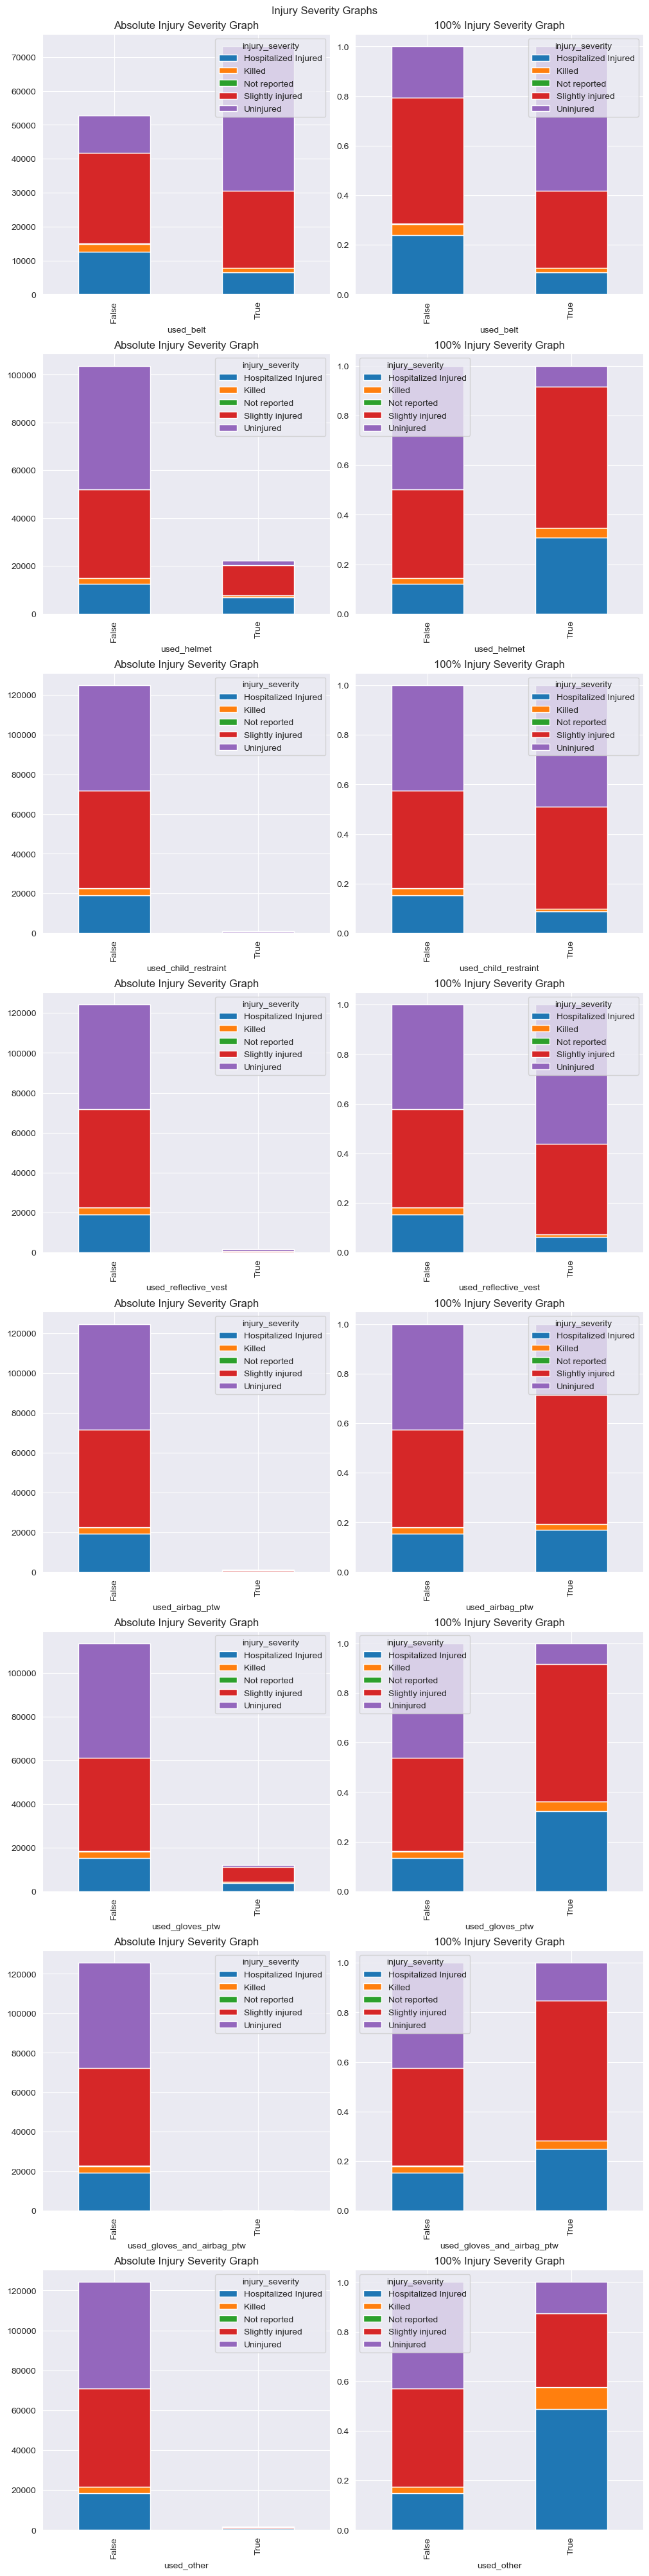

In [32]:
rows = len(SECU_FLAG.items())

fig, axes = plt.subplots(rows, 2, figsize=(10, 5 * rows), constrained_layout=True)
fig.suptitle('Injury Severity Graphs')
plt.plot()

i = 0
for key, value in SECU_FLAG.items():
    tmp = df_users_secure_flags[[value, 'injury_severity']].copy()
    tmp['injury_severity'] = tmp['injury_severity'].map(codebook['injury_severity'])

    test = tmp.groupby(by=[value, 'injury_severity']).size().unstack()
    test.plot(kind='bar', stacked=True, title='Absolute Injury Severity Graph', ax=axes[i, 0])
    test.div(test.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title='100% Injury Severity Graph', ax=axes[i, 1])
    i += 1